In [3]:
#   ______                                       ___     
#  /\__  _\                                    /'___`\   
#  \/_/\ \/    __     _ __    __     __       /\_\ /\ \  
#     \ \ \  /'__`\  /\`'__\/'__`\ /'__`\     \/_/// /__ 
#      \ \ \/\ \L\.\_\ \ \//\  __//\ \L\.\_      // /_\ \
#       \ \_\ \__/.\_\\ \_\\ \____\ \__/.\_\    /\______/
#        \/_/\/__/\/_/ \/_/ \/____/\/__/\/_/    \/_____/ 
#                                                                                                     

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from casadi import *

## Punto 1. 

In [2]:
x_1 = np.linspace(-1, 31, 5000)
y_1 = np.linspace(-2, 36, 5000)

x, y = np.meshgrid(x_1, y_1)
f = 5*exp(-0.01*((x-15)**2 + (y-20)**2)) - 2*exp(-0.08*((x-20)**2 + (y-15)**2)) + 3*exp(-0.08*((x-25)**2 + (y-10)**2)) + 2*exp(-0.1*((x-10)**2 + (y-10)**2)) - 2*exp(-0.5*((x-5)**2 + (y-10)**2)) - 4*exp(-0.1*((x-15)**2 + (y-5)**2)) - 2*exp(-0.5*((x-8)**2 + (y-25)**2)) - 2*exp(-0.5*((x-21)**2 + (y-25)**2)) + 2*exp(-0.5*((x-25)**2 + (y-16)**2)) + 2*exp(-0.5*((x-5)**2 + (y-14)**2))

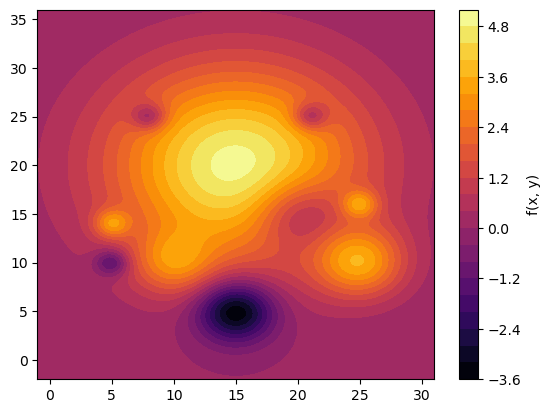

In [3]:
plt.contourf(x, y, f, levels=25, cmap="inferno")
plt.colorbar(label='f(x, y)')

In [40]:
opti = Opti()
x1 = opti.variable()
y1 = opti.variable()
f_ = 5*exp(-0.01*((x1-15)**2 + (y1-20)**2)) - 2*exp(-0.08*((x1-20)**2 + (y1-15)**2)) + 3*exp(-0.08*((x1-25)**2 + (y1-10)**2)) + 2*exp(-0.1*((x1-10)**2 + (y1-10)**2)) - 2*exp(-0.5*((x1-5)**2 + (y1-10)**2)) - 4*exp(-0.1*((x1-15)**2 + (y1-5)**2)) - 2*exp(-0.5*((x1-8)**2 + (y1-25)**2)) - 2*exp(-0.5*((x1-21)**2 + (y1-25)**2)) + 2*exp(-0.5*((x1-25)**2 + (y1-16)**2)) + 2*exp(-0.5*((x1-5)**2 + (y1-14)**2))


initial = [(15,20),(25,10),(25,16),(10,10),(5,14)]
valores = []


opti.minimize(-f_)
opti.solver('sqpmethod')
opti.subject_to(x1>=-1)
opti.subject_to(31>=x1)
opti.subject_to(y1>=-2)
opti.subject_to(36>=y1)

for i in initial:
    xi, yi = i
    opti.set_initial(x1, xi)
    opti.set_initial(y1, yi)
    sol = opti.solve()
    valores.append((sol.value(x1),sol.value(y1)))


qpOASES -- An Implementation of the Online Active Set Strategy.
Copyright (C) 2007-2015 by Hans Joachim Ferreau, Andreas Potschka,
Christian Kirches et al. All rights reserved.

qpOASES is distributed under the terms of the 
GNU Lesser General Public License 2.1 in the hope that it will be 
useful, but WITHOUT ANY WARRANTY; without even the implied warranty 
of MERCHANTABILITY or FITNESS FOR A PARTICULAR PURPOSE. 
See the GNU Lesser General Public License for more details.

-------------------------------------------
This is casadi::Sqpmethod.
Using exact Hessian
Number of variables:                               2
Number of constraints:                             4
Number of nonzeros in constraint Jacobian:         4
Number of nonzeros in Lagrangian Hessian:          4

iter      objective    inf_pr    inf_du     ||d||  lg(rg) ls    info
   0  -4.963377e+00  0.00e+00  2.93e-02  0.00e+00       -  0  - 


####################   qpOASES  --  QP NO.   1   #####################

    Iter

[(14.78471507565251, 20.215098377726218), (24.779908445161595, 10.220207209839627), (24.946150398624543, 16.003689398918638), (10.417425350184978, 10.946127704918585), (5.151029151928393, 14.066188866197285)]


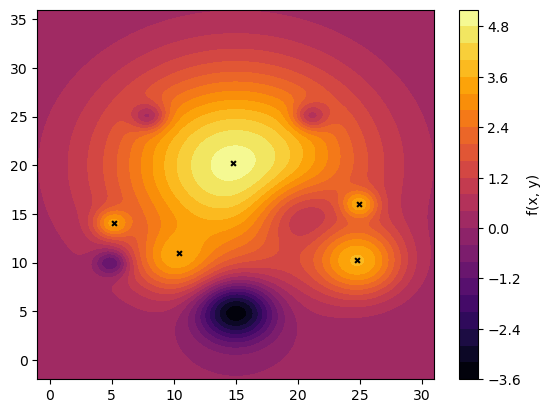

In [42]:
print(valores)
plt.contourf(x, y, f, levels=25, cmap="inferno")
plt.colorbar(label='f(x, y)')
for val in valores:
    plt.scatter(val[0], val[1], marker='x', color='black', s=12)



## Punto 2. 

## Punto 3. 

In [17]:
gamma1 = gamma2 = 0.4
A1 = A2 = 50.27
A3 = A4 = 28.27
a1 = 0.233
a2 = 0.242
a3 = a4 = 0.127
g = 980 #cm/s

x = MX.sym('x', 4)
u = MX.sym('u', 2)

dx1 = -(a1/A1)*sqrt(fmax(2*g*x[0],0.001))+a3/A1*sqrt(fmax(2*g*x[2],0.001))+gamma1/A1*u[0]
dx2 = -(a2/A2)*sqrt(fmax(2*g*x[1],0.001))+a4/A2*sqrt(fmax(2*g*x[3],0.001))+gamma2/A2*u[1]
dx3 = -(a3/A4)*sqrt(fmax(2*g*x[2],0.001))+(1-gamma2)/A3*u[1]
dx4 = -(a4/A4)*sqrt(fmax(2*g*x[3],0.001))+(1-gamma1)/A4*u[0]


func = vertcat(dx1,dx2,dx3,dx4)
f = Function('f', [x, u], [func])

In [22]:
N = 20
dt = 3
nx = 4
nu = 2

int_opt = {"number_of_finite_elements":1,"tf":3}
intg = integrator('intg', 'rk', {'x':x,'p': u, 'ode': f(x,u)}, int_opt)
r = intg(x0 = x, p = u)
F = Function('F', [x, u], [r['xf']])

In [30]:
opti = Opti()
X = opti.variable(4, 20+1)
U = opti.variable(20, 2)
# Tanques
h1 = X[0,:]
h2 = X[1,:]
h3 = X[2,:]
h4 = X[3,:]

# Contorl
u1 = U[:,0]
u2 = U[:,1]
opti.subject_to(u1<60)
opti.subject_to(u2<60)

#valores iniciales
x0 = opti.parameter(4)
opti.subject_to(X[:,0] == x0)



In [31]:
for i in range(20):
    opti.subject_to(X[:,i+1] == F(X[:,i],U[i,:]))

In [32]:
xr =np.array([13.98,14.06,14.25,21.42])
Q1 = 3
Q2 = 3
Q3 = 0.03
Q4 = 0.03

R1 = 0.0033
R2 = 0.0033

opti.minimize( (Q1* sumsqr(h1-xr[0])+ Q2*sumsqr(h2-xr[1])+ Q3*sumsqr(h3-xr[2])+  Q4*sumsqr(h4-xr[3]))+ (R1*sumsqr(u1)+ R2*sumsqr(u2)))
opti.set_value(x0,vertcat(2,2,2,2))
# Solver
options = dict()
#options["print_time"] = False
# options["expand"] = True # La evualuacion de las funciones es mas rapido a costa de memoria
opti.solver('ipopt',options)
sol = opti.solve()
# Función que haga los pasos del MPC
mpc_step = opti.to_function('mpc_step',[x0, opti.x, opti.lam_g],[U[0,:], opti.x, opti.lam_g])
u = sol.value(U[0,:])
x = sol.value(opti.x)
lam = sol.value(opti.lam_g)

k = 40
x_history = DM.zeros(nx,k)
u_history = DM.zeros(nu,k)
current_x = vertcat(2,2,2,2)

for i in range(k):
    u_history[:,i] = u
    x_history[:,i] = current_x

    current_x = F(current_x,u)
    [u,x,lam] = mpc_step(current_x,x,lam)

This is Ipopt version 3.14.11, running with linear solver MUMPS 5.4.1.

Number of nonzeros in equality constraint Jacobian...:      324
Number of nonzeros in inequality constraint Jacobian.:       40
Number of nonzeros in Lagrangian Hessian.............:      344

Total number of variables............................:      124
                     variables with only lower bounds:        0
                variables with lower and upper bounds:        0
                     variables with only upper bounds:        0
Total number of equality constraints.................:       84
Total number of inequality constraints...............:       40
        inequality constraints with only lower bounds:        0
   inequality constraints with lower and upper bounds:        0
        inequality constraints with only upper bounds:       40

iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
   0  2.5183796e+04 2.00e+00 8.44e+01  -1.0 0.00e+00    -  0.00e+00 0.00e+00 

   4  1.1971722e+03 5.12e-06 3.07e-04  -2.5 8.73e-01    -  9.88e-01 1.00e+00f  1
   5  1.1970714e+03 4.34e-07 3.66e-06  -3.8 4.94e-01    -  1.00e+00 1.00e+00f  1
   6  1.1970654e+03 1.50e-08 1.06e-07  -3.8 1.01e-01    -  1.00e+00 1.00e+00f  1
   7  1.1970632e+03 1.38e-10 1.19e-09  -5.7 8.45e-03    -  1.00e+00 1.00e+00f  1
   8  1.1970631e+03 1.42e-14 1.39e-13  -8.6 8.84e-05    -  1.00e+00 1.00e+00h  1

Number of Iterations....: 8

                                   (scaled)                 (unscaled)
Objective...............:   1.1970631421480227e+03    1.1970631421480227e+03
Dual infeasibility......:   1.3855583347321954e-13    1.3855583347321954e-13
Constraint violation....:   1.4210854715202004e-14    1.4210854715202004e-14
Variable bound violation:   0.0000000000000000e+00    0.0000000000000000e+00
Complementarity.........:   2.6276365407575739e-09    2.6276365407575739e-09
Overall NLP error.......:   2.6276365407575739e-09    2.6276365407575739e-09


Number of objective function e

   8  5.0856262e+02 1.94e-11 1.21e-10  -5.7 3.57e-03    -  1.00e+00 1.00e+00h  1
   9  5.0856260e+02 3.91e-14 2.91e-13  -8.6 1.44e-04    -  1.00e+00 1.00e+00h  1

Number of Iterations....: 9

                                   (scaled)                 (unscaled)
Objective...............:   5.0856260401888738e+02    5.0856260401888738e+02
Dual infeasibility......:   2.9132252166164108e-13    2.9132252166164108e-13
Constraint violation....:   3.9079850466805510e-14    3.9079850466805510e-14
Variable bound violation:   0.0000000000000000e+00    0.0000000000000000e+00
Complementarity.........:   2.8025844518371837e-09    2.8025844518371837e-09
Overall NLP error.......:   2.8025844518371837e-09    2.8025844518371837e-09


Number of objective function evaluations             = 10
Number of objective gradient evaluations             = 10
Number of equality constraint evaluations            = 10
Number of inequality constraint evaluations          = 10
Number of equality constraint Jacobian ev

   2  2.6348018e+02 4.56e-04 1.86e-01  -1.0 1.17e+01    -  3.57e-01 1.00e+00f  1
   3  2.6329254e+02 5.26e-05 3.21e-04  -1.0 4.89e+00    -  1.00e+00 1.00e+00f  1
   4  2.6319918e+02 2.00e-06 2.19e-04  -2.5 9.88e-01    -  9.89e-01 1.00e+00f  1
   5  2.6317550e+02 6.04e-07 4.15e-06  -3.8 6.42e-01    -  1.00e+00 1.00e+00f  1
   6  2.6317343e+02 1.45e-07 9.03e-07  -3.8 3.09e-01    -  1.00e+00 1.00e+00f  1
   7  2.6317309e+02 2.82e-08 1.75e-07  -5.7 1.36e-01    -  1.00e+00 1.00e+00h  1
   8  2.6317308e+02 1.99e-09 1.23e-08  -5.7 3.62e-02    -  1.00e+00 1.00e+00h  1
   9  2.6317308e+02 1.63e-11 1.01e-10  -8.6 3.28e-03    -  1.00e+00 1.00e+00h  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
  10  2.6317308e+02 3.55e-15 2.51e-14  -8.6 2.47e-05    -  1.00e+00 1.00e+00h  1

Number of Iterations....: 10

                                   (scaled)                 (unscaled)
Objective...............:   2.6317307555038036e+02    2.6317307555038036e+02
Dual infeas

   1  2.2091427e+02 1.72e-04 8.26e-03  -1.0 4.93e-01    -  9.92e-01 1.00e+00h  1
   2  2.2090814e+02 4.98e-07 1.17e-05  -1.7 1.06e-01    -  1.00e+00 1.00e+00h  1
   3  2.2090804e+02 3.28e-08 1.09e-07  -3.8 2.75e-02    -  1.00e+00 1.00e+00h  1
   4  2.2090804e+02 2.17e-12 1.84e-11  -5.7 2.23e-04    -  1.00e+00 1.00e+00h  1
   5  2.2090804e+02 3.55e-15 2.51e-14  -8.6 2.52e-06    -  1.00e+00 1.00e+00h  1

Number of Iterations....: 5

                                   (scaled)                 (unscaled)
Objective...............:   2.2090803746867095e+02    2.2090803746867095e+02
Dual infeasibility......:   2.5059035600428338e-14    2.5059035600428338e-14
Constraint violation....:   3.5527136788005009e-15    3.5527136788005009e-15
Variable bound violation:   0.0000000000000000e+00    0.0000000000000000e+00
Complementarity.........:   2.5060486313332000e-09    2.5060486313332000e-09
Overall NLP error.......:   2.5060486313332000e-09    2.5060486313332000e-09


Number of objective function e

   5  2.2538009e+02 3.55e-15 2.51e-14  -8.6 2.52e-06    -  1.00e+00 1.00e+00h  1

Number of Iterations....: 5

                                   (scaled)                 (unscaled)
Objective...............:   2.2538008811955660e+02    2.2538008811955660e+02
Dual infeasibility......:   2.5059035600428338e-14    2.5059035600428338e-14
Constraint violation....:   3.5527136788005009e-15    3.5527136788005009e-15
Variable bound violation:   0.0000000000000000e+00    0.0000000000000000e+00
Complementarity.........:   2.5060500997135222e-09    2.5060500997135222e-09
Overall NLP error.......:   2.5060500997135222e-09    2.5060500997135222e-09


Number of objective function evaluations             = 6
Number of objective gradient evaluations             = 6
Number of equality constraint evaluations            = 6
Number of inequality constraint evaluations          = 6
Number of equality constraint Jacobian evaluations   = 6
Number of inequality constraint Jacobian evaluations = 6
Number of La

   4  2.3046463e+02 2.27e-12 1.84e-11  -5.7 2.22e-04    -  1.00e+00 1.00e+00h  1
   5  2.3046463e+02 3.55e-15 2.51e-14  -8.6 2.52e-06    -  1.00e+00 1.00e+00h  1

Number of Iterations....: 5

                                   (scaled)                 (unscaled)
Objective...............:   2.3046462994836963e+02    2.3046462994836963e+02
Dual infeasibility......:   2.5059035600428338e-14    2.5059035600428338e-14
Constraint violation....:   3.5527136788005009e-15    3.5527136788005009e-15
Variable bound violation:   0.0000000000000000e+00    0.0000000000000000e+00
Complementarity.........:   2.5060517793855199e-09    2.5060517793855199e-09
Overall NLP error.......:   2.5060517793855199e-09    2.5060517793855199e-09


Number of objective function evaluations             = 6
Number of objective gradient evaluations             = 6
Number of equality constraint evaluations            = 6
Number of inequality constraint evaluations          = 6
Number of equality constraint Jacobian evalua

   4  2.3311481e+02 2.30e-12 1.84e-11  -5.7 2.22e-04    -  1.00e+00 1.00e+00h  1
   5  2.3311481e+02 3.55e-15 2.51e-14  -8.6 2.51e-06    -  1.00e+00 1.00e+00h  1

Number of Iterations....: 5

                                   (scaled)                 (unscaled)
Objective...............:   2.3311481303908164e+02    2.3311481303908164e+02
Dual infeasibility......:   2.5059035600428338e-14    2.5059035600428338e-14
Constraint violation....:   3.5527136788005009e-15    3.5527136788005009e-15
Variable bound violation:   0.0000000000000000e+00    0.0000000000000000e+00
Complementarity.........:   2.5060529666309482e-09    2.5060529666309482e-09
Overall NLP error.......:   2.5060529666309482e-09    2.5060529666309482e-09


Number of objective function evaluations             = 6
Number of objective gradient evaluations             = 6
Number of equality constraint evaluations            = 6
Number of inequality constraint evaluations          = 6
Number of equality constraint Jacobian evalua

   1  2.3454420e+02 7.39e-07 8.78e-03  -1.0 4.86e-02    -  9.91e-01 1.00e+00h  1
   2  2.3454317e+02 1.41e-07 9.05e-07  -1.7 2.67e-02    -  1.00e+00 1.00e+00h  1
   3  2.3454310e+02 3.33e-08 1.13e-07  -3.8 2.73e-02    -  1.00e+00 1.00e+00h  1
   4  2.3454310e+02 2.33e-12 1.84e-11  -5.7 2.21e-04    -  1.00e+00 1.00e+00h  1
   5  2.3454310e+02 3.55e-15 2.51e-14  -8.6 2.51e-06    -  1.00e+00 1.00e+00h  1

Number of Iterations....: 5

                                   (scaled)                 (unscaled)
Objective...............:   2.3454309547507987e+02    2.3454309547507987e+02
Dual infeasibility......:   2.5059035600428338e-14    2.5059035600428338e-14
Constraint violation....:   3.5527136788005009e-15    3.5527136788005009e-15
Variable bound violation:   0.0000000000000000e+00    0.0000000000000000e+00
Complementarity.........:   2.5060539300449395e-09    2.5060539300449395e-09
Overall NLP error.......:   2.5060539300449395e-09    2.5060539300449395e-09


Number of objective function e

   1  2.3527694e+02 2.38e-07 8.79e-03  -1.0 4.90e-02    -  9.91e-01 1.00e+00h  1
   2  2.3527600e+02 1.36e-07 8.37e-07  -1.7 2.66e-02    -  1.00e+00 1.00e+00h  1
   3  2.3527593e+02 3.35e-08 1.14e-07  -3.8 2.73e-02    -  1.00e+00 1.00e+00h  1
   4  2.3527593e+02 2.35e-12 1.84e-11  -5.7 2.21e-04    -  1.00e+00 1.00e+00h  1
   5  2.3527593e+02 3.55e-15 2.51e-14  -8.6 2.51e-06    -  1.00e+00 1.00e+00h  1

Number of Iterations....: 5

                                   (scaled)                 (unscaled)
Objective...............:   2.3527592514630595e+02    2.3527592514630595e+02
Dual infeasibility......:   2.5059035600428338e-14    2.5059035600428338e-14
Constraint violation....:   3.5527136788005009e-15    3.5527136788005009e-15
Variable bound violation:   0.0000000000000000e+00    0.0000000000000000e+00
Complementarity.........:   2.5060546243546501e-09    2.5060546243546501e-09
Overall NLP error.......:   2.5060546243546501e-09    2.5060546243546501e-09


Number of objective function e

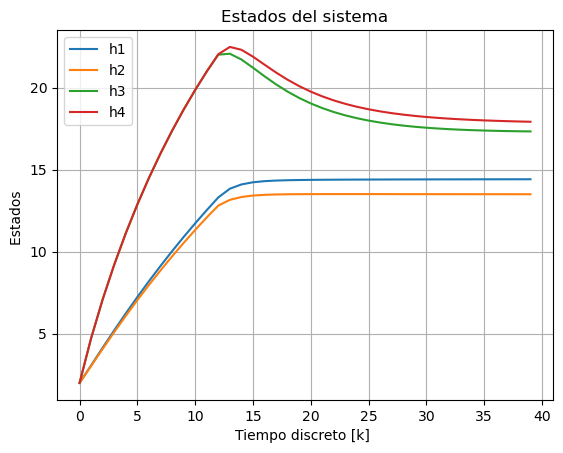

In [33]:
plt.figure()
plt.title("Estados del sistema")
plt.ylabel("Estados ")
plt.xlabel("Tiempo discreto [k] ")
plt.plot(x_history.T)
location = 0
legend_drawn_flag = True
plt.legend(["h1", "h2", "h3","h4"], loc=0, frameon=legend_drawn_flag)
plt.grid()
plt.show()

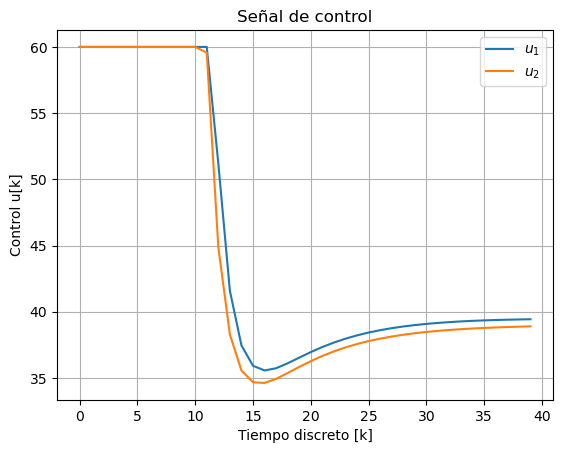

In [6]:
plt.figure()
plt.plot(u_history.T)
plt.title('Señal de control')
plt.ylabel('Control u[k]')
plt.xlabel('Tiempo discreto [k]')
plt.legend(["$u_1$", "$u_2$"], loc=0, frameon=legend_drawn_flag)
plt.grid()
plt.show()